# Imports needed

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline



# Reading and cleaning the data

In [30]:
cancer = pd.read_csv('https://raw.githubusercontent.com/fenago/DSBook/main/Chapter%201/Cancer%20Dataset.csv')

In [31]:
#Check the head of the data
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:>

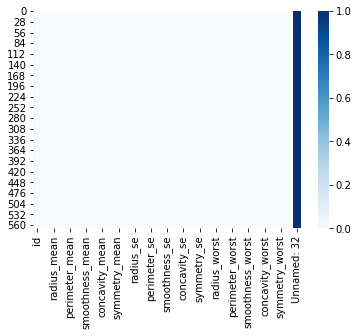

In [32]:
#Heatmap for all null values
sns.heatmap(cancer.isnull(),cmap='Blues')

In [33]:
#Drop unnamed column & replace diagnosis with numerical values
cancer.drop('Unnamed: 32',axis=1,inplace=True)
cancer.diagnosis = [1 if each == "M" else 0 for each in cancer.diagnosis]

# Train Test Split

In [34]:
#Choosing features and label
Features = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

Label = cancer['diagnosis']

In [35]:
# Scaling the data

scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Training the model

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='liblinear',C=1,max_iter=30,multi_class='auto')

In [39]:
logr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=30, solver='liblinear')

In [40]:
logpred = logr.predict(X_test)

In [41]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,logpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,logpred))

Logistic Regression

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       1.00      0.93      0.96        68

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


confusion matrix
[[103   0]
 [  5  63]]
